## Pipeline

This is a summery of the used function in one pipline.

# For a detaile d 

In [1]:
def pipeline(undist_Img, plot_flag):
    
    #####Sobel Threshold 
    sobel_thresh = (30,220)
    mag_thresh   = (30, 220)
    dir_thresh   = (0.6, 1.1)
    bin_thresh   = (180, 255)
    rgb_thresh   = (200, 255)
    hls_L_thresh = (90, 255)
    hls_H_thresh = (15, 100)
    hls_thresh = hls_L_thresh + hls_H_thresh

    thresh = [sobel_thresh, mag_thresh, dir_thresh, bin_thresh, \
              rgb_thresh, hls_thresh]
    ksize = 9
    binary_best_combi = line.pipline_combination(undist_Img, ksize, thresh, plot_flag)

    # ROI - Four Side Polygone -> polygon_roi(img, imshape, y_line, x_left, x_right, rgb_threshold)      
    img_shape_y = binary_best_combi.shape[0]
    ima_shape_x = binary_best_combi.shape[1]
    y_line  = img_shape_y - 275
    x_left  = ima_shape_x - 675
    x_right = ima_shape_x - 610
    bottom_left  = 180
    bottom_right = ima_shape_x - 150 
    
    # for Binary Image
    vertices = fnc.polygon_roi_binary(binary_best_combi,bottom_left, bottom_right,y_line, x_left, x_right)
    warped_bin = line.perspective_transform(binary_best_combi, vertices)
    
    # Histogram
    histogram =  line.hist(warped_bin, plot_flag)
    
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    out = line.find_pixels(warped_bin, nwindows, margin, minpix, plot_flag)
    ployfit_out_img = line.fit_polinominal(warped_bin, out, plot_flag)
    
    # Calc Curvature
    ooc = line.calc_curvature_ooc(warped_bin)
    undist_Img_copy = np.copy(undist_Img)
    
    # Draw lane on Original Image
    colerd_lane_img = line.draw_lane_on_image(undist_Img_copy,warped_bin)
    colerd_lane_img.astype(np.uint8)
    img_text = "Radius of curvature: " + str(round((line.left_curverad + line.right_curverad)/2)) + ' (m)'

    if ooc<+ 0:
        img_text2 = "Vehicle is: " + str(round(np.abs(ooc),2)) + ' (m) left of center'
    else:
        img_text2 = "Vehicle is: " + str(round(np.abs(ooc),2)) + ' (m) right of center'


    cv2.putText(colerd_lane_img, img_text, (40, 70), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255, 255, 255), 2)
    cv2.putText(colerd_lane_img, img_text2, (40, 140), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255, 255, 255), 2)
    
    return colerd_lane_img

---------------Function Import done!----------------


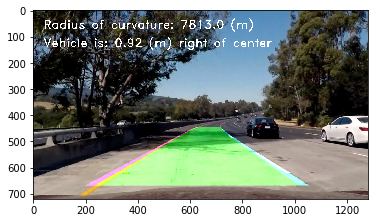

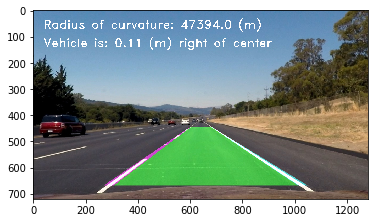

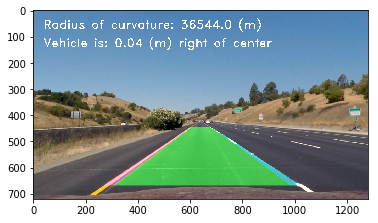

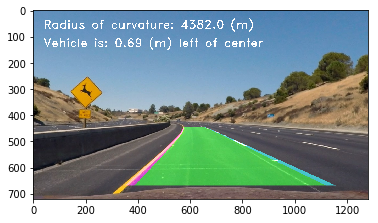

In [2]:
import pickle
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import function as fnc
import FindingLane as lane
import scipy.misc
%matplotlib inline

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open("Camera_Calib_Values/wide_dist_pickle9Corner_class.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

images = glob.glob('test_images/TestPipline/*.jpg')

for idx, fname in enumerate(images):
    color_img, shape = fnc.readIMG(fname)

    line = lane.Lines()
    line.set_cam_calib_param(mtx,dist)

    undist_Img = line.undistort(color_img)
    outputIMG = pipeline(undist_Img, None)
    plt.imshow(outputIMG)
    plt.show()
    
    # Save Image
    #write_name = 'output_images/Colored_Lane_Measured/Output_Img_Colored' + str(idx)+'.jpg'
    #scipy.misc.imsave(write_name, outputIMG)